In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

#### loading data

In [11]:
dataset=pd.read_csv("../Data_Science/data/Shakespeare_data.csv")
dataset.head()

,Dataline,Play,PlayerLinenumber,ActSceneLine,Player,PlayerLine
0,1,Henry IV,NaN,NaN,NaN,ACT I
1,2,Henry IV,NaN,NaN,NaN,SCENE I. London. The palace.
2,3,Henry IV,NaN,NaN,NaN,"Enter KING HENRY, LORD JOHN OF LANCASTER, the ..."
3,4,Henry IV,1.0,1.1.1,KING HENRY IV,"So shaken as we are, so wan with care,"
4,5,Henry IV,1.0,1.1.2,KING HENRY IV,"Find we a time for frighted peace to pant,"


In [12]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111396 entries, 0 to 111395
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Dataline          111396 non-null  int64  
 1   Play              111396 non-null  object 
 2   PlayerLinenumber  111393 non-null  float64
 3   ActSceneLine      105153 non-null  object 
 4   Player            111389 non-null  object 
 5   PlayerLine        111396 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 5.1+ MB


#### checking null data

In [4]:
dataset.isnull().sum()

Dataline               0
Play                   0
PlayerLinenumber       3
ActSceneLine        6243
Player                 7
PlayerLine             0
dtype: int64

#### Replacing NaN data in player column with "other"

In [5]:
dataset['Player'].replace(np.nan, 'Other',inplace = True)
dataset.head()


,Dataline,Play,PlayerLinenumber,ActSceneLine,Player,PlayerLine
0,1,Henry IV,NaN,NaN,Other,ACT I
1,2,Henry IV,NaN,NaN,Other,SCENE I. London. The palace.
2,3,Henry IV,NaN,NaN,Other,"Enter KING HENRY, LORD JOHN OF LANCASTER, the ..."
3,4,Henry IV,1.0,1.1.1,KING HENRY IV,"So shaken as we are, so wan with care,"
4,5,Henry IV,1.0,1.1.2,KING HENRY IV,"Find we a time for frighted peace to pant,"


In [6]:
dataset=dataset.dropna()
dataset.reset_index(drop=True, inplace=True)
dataset.shape


(105153, 6)

In [7]:
print("Number of plays are: " + str(dataset['Play'].nunique()))

Number of plays are: 36


#### checking number of players in each play

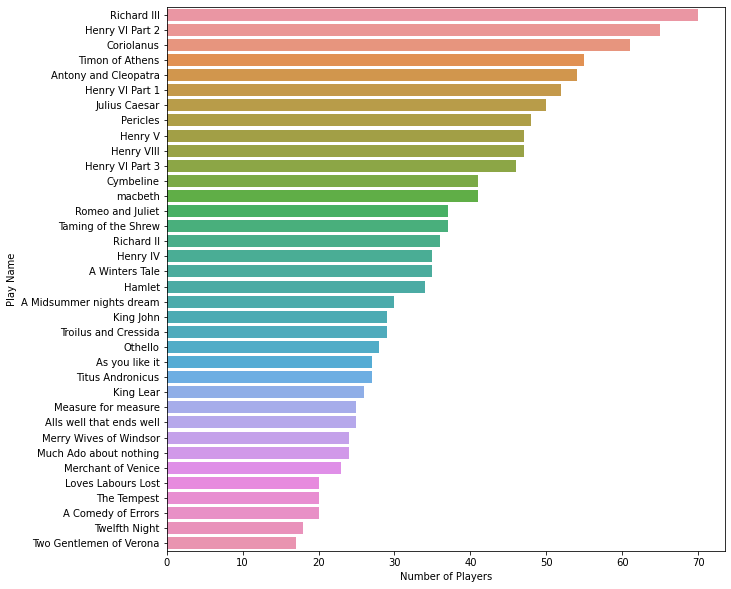

In [8]:
pd.DataFrame(dataset['Play'].unique().tolist(), columns=['Play Name'])
Playersperplay = dataset.groupby(['Play'])['Player'].nunique().sort_values(ascending= False).to_frame()
Playersperplay['Play'] = Playersperplay.index.tolist()
Playersperplay.columns = ['Num Players','Play']
Playersperplay.index= np.arange(0,len(Playersperplay))
plt.figure(figsize=(10,10))
ax = sns.barplot(x='Num Players',y='Play',data=Playersperplay)
ax.set(xlabel='Number of Players', ylabel='Play Name')
plt.show()

#### checking number of lines in each play

In [9]:
play_data = dataset.groupby('Play').count().sort_values(by='PlayerLine',ascending=False)['PlayerLine']
play_data = play_data.to_frame()
play_data['Play'] = play_data.index.tolist()
play_data.index = np.arange(0,len(play_data)) #changing the index from plays to numbers
play_data.columns =['Lines','Play']
play_data

,Lines,Play
0,4020,Hamlet
1,3768,Coriolanus
2,3757,Cymbeline
3,3705,Richard III
4,3565,Antony and Cleopatra
5,3563,Othello
6,3500,King Lear
7,3491,Troilus and Cressida
8,3364,A Winters Tale
9,3279,Henry VIII


#### Plotting the graph to see how many number of lines in each play

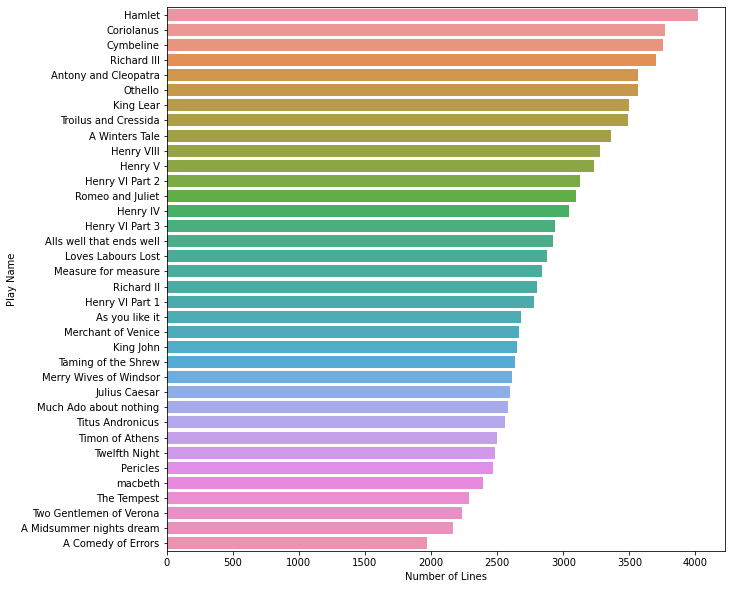

In [10]:
plt.figure(figsize=(10,10))
ax= sns.barplot(x='Lines',y='Play',data=play_data, order = play_data['Play'])
ax.set(xlabel='Number of Lines', ylabel='Play Name')
plt.show()

#### checking number of lines for each player in every play

In [11]:
lines_per_player= dataset.groupby(['Play','Player']).count()['PlayerLine']
lines_per_player= lines_per_player.to_frame()
lines_per_player

PlayerLine
Play               Player                      
A Comedy of Errors ADRIANA                  276
                   AEGEON                   147
                   AEMELIA                   73
                   ANGELO                    96
                   ANTIPHOLUS                 6
...                                         ...
macbeth            Son                       20
                   Third Apparition           5
                   Third Murderer             8
                   Third Witch               27
                   YOUNG SIWARD               7

[1303 rows x 1 columns]

In [12]:
#Feature Engineering
dataset.loc[2]['PlayerLine']

'And breathe short-winded accents of new broils'

#### coverting the text to lowercase

In [13]:

dataset['PlayerLine_parsed'] = dataset['PlayerLine'].str.lower()

#### Removing the punctuations in the lines

In [14]:
punctuation_signs = list("?:!.,;")
dataset['PlayerLine_parsed_2'] = dataset['PlayerLine_parsed']

for punct_sign in punctuation_signs:
    dataset['PlayerLine_parsed_2'] = dataset['PlayerLine_parsed_2'].str.replace(punct_sign, '')

In [15]:
#remove possessive pronoun terminations
dataset['PlayerLine_parsed_3'] = dataset['PlayerLine_parsed_2'].str.replace("'s", "")

In [16]:
#Lemmitization
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download('punkt')
nltk.download('wordnet')


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/sushmithareddyboddireddy/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/sushmithareddyboddireddy/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [17]:
# Saving the lemmatizer into an object
wordnet_lemmatizer = WordNetLemmatizer()

In [18]:
#In order to lemmatize, we have to iterate through every word:

nrows = len(dataset)
lemmatized_text_list = []

for row in range(0, nrows):
    
    # Create an empty list containing lemmatized words
    lemmatized_list = []
    
    # Save the text and its words into an object
    text = dataset.loc[row]['PlayerLine_parsed_3']
    text_words = text.split(" ")

    # Iterate through every word to lemmatize
    for word in text_words:
        lemmatized_list.append(wordnet_lemmatizer.lemmatize(word, pos="v"))
        
    # Join the list
    lemmatized_text = " ".join(lemmatized_list)
    
    # Append to the list containing the texts
    lemmatized_text_list.append(lemmatized_text)

In [19]:
dataset['PlayerLine_parsed_4'] = lemmatized_text_list

In [20]:
#stop words
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/sushmithareddyboddireddy/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [21]:
# Loading the stop words in english
stop_words = list(stopwords.words('english'))

In [22]:
stop_words[0:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [23]:
dataset['PlayerLine_parsed_5'] = dataset['PlayerLine_parsed_4']

for stop_word in stop_words:

    regex_stopword = r"\b" + stop_word + r"\b"
    dataset['PlayerLine_parsed_5'] = dataset['PlayerLine_parsed_5'].str.replace(regex_stopword, '')

In [24]:
to_drop = ['PlayerLine_parsed','PlayerLine_parsed_2', 'PlayerLine_parsed_3','PlayerLine_parsed_4']
dataset.drop(to_drop, inplace=True, axis=1)

In [25]:
dataset = dataset.rename(columns={'PlayerLine_parsed_5': 'PlayerLine_parsed'})
dataset.head()

,Dataline,Play,PlayerLinenumber,ActSceneLine,Player,PlayerLine,PlayerLine_parsed
0,4,Henry IV,1.0,1.1.1,KING HENRY IV,"So shaken as we are, so wan with care,",shake wan care
1,5,Henry IV,1.0,1.1.2,KING HENRY IV,"Find we a time for frighted peace to pant,",find time fright peace pant
2,6,Henry IV,1.0,1.1.3,KING HENRY IV,And breathe short-winded accents of new broils,breathe short-winded accent new broil
3,7,Henry IV,1.0,1.1.4,KING HENRY IV,To be commenced in strands afar remote.,commence strand afar remote
4,8,Henry IV,1.0,1.1.5,KING HENRY IV,No more the thirsty entrance of this soil,thirsty entrance soil


#### Machine learning models require numeric features and labels to provide a prediction. For this reason we must create a dictionary to map each label to a numerical ID. 
##### Here labels are Players

In [26]:
players = dataset.Player.unique()
i=0
Player_codes = dict()
for player in players:
    Player_codes[player]=i
    i=i+1

In [27]:
plays = dataset.Play.unique()
j=0
Play_codes = dict()
for play in plays:
    Play_codes[play]=j
    j=j+1

In [28]:
PlayerLinenumbers = dataset.PlayerLinenumber.unique()
k=0.01
PlayerLinenumber_codes = dict()
for PlayerLinenumber in PlayerLinenumbers:
    PlayerLinenumber_codes[PlayerLinenumber]=k
    k=k+1

In [29]:
ActSceneLines = dataset.ActSceneLine.unique()
j=0
ActSceneLine_codes = dict()
for ActSceneLine in ActSceneLines:
    ActSceneLine_codes[ActSceneLine]=j
    j=j+1

In [30]:
dataset['Player_code'] = dataset['Player']
dataset = dataset.replace({'Player_code':Player_codes})

In [31]:
dataset['Play_code'] = dataset['Play']
dataset = dataset.replace({'Play_code':Play_codes})

In [32]:
dataset['PlayerLinenumber_code'] = dataset['PlayerLinenumber']
dataset = dataset.replace({'PlayerLinenumber_code':PlayerLinenumber_codes})

In [33]:
dataset['ActSceneLine_code'] = dataset['ActSceneLine']
dataset = dataset.replace({'ActSceneLine_code':ActSceneLine_codes})

In [34]:
from sklearn.feature_extraction.text import TfidfVectorizer
ngram_range = (1,2)
max_features = 100
min_df = 10
max_df = 20
tfidf = TfidfVectorizer(encoding='utf-8',
                        ngram_range=ngram_range,
                        lowercase=True,
                        norm='l2',
                        max_features=max_features,
                        max_df=max_df,
                        min_df=min_df,
                        sublinear_tf=True)
                        
features_train = tfidf.fit_transform(dataset['PlayerLine']).toarray()

In [35]:
from sklearn.feature_extraction.text import CountVectorizer
cvec = CountVectorizer(input='content', encoding='utf-8', 
                     decode_error='strict',
                     analyzer='word'
                      )
features_train1 = cvec.fit_transform(dataset.PlayerLine_parsed).toarray()
print(features_train1.shape)

(105153, 18379)


In [36]:
dataExpanded = dataset['ActSceneLine'].str.split('.', expand=True)
dataset['Act'] = dataExpanded[0]
dataset['Scene'] = dataExpanded[1]
dataset['SceneLine'] = dataExpanded[2]
dataset=dataset.drop(columns=['ActSceneLine'])
dataset.head()

,Dataline,Play,PlayerLinenumber,Player,PlayerLine,PlayerLine_parsed,Player_code,Play_code,PlayerLinenumber_code,ActSceneLine_code,Act,Scene,SceneLine
0,4,Henry IV,1.0,KING HENRY IV,"So shaken as we are, so wan with care,",shake wan care,0,0,0.01,0,1,1,1
1,5,Henry IV,1.0,KING HENRY IV,"Find we a time for frighted peace to pant,",find time fright peace pant,0,0,0.01,1,1,1,2
2,6,Henry IV,1.0,KING HENRY IV,And breathe short-winded accents of new broils,breathe short-winded accent new broil,0,0,0.01,2,1,1,3
3,7,Henry IV,1.0,KING HENRY IV,To be commenced in strands afar remote.,commence strand afar remote,0,0,0.01,3,1,1,4
4,8,Henry IV,1.0,KING HENRY IV,No more the thirsty entrance of this soil,thirsty entrance soil,0,0,0.01,4,1,1,5


In [37]:
f=pd.DataFrame(data=features_train[0:,0:], index=[i for i in range(features_train.shape[0])],columns=['f'+str(i) for i in range(features_train.shape[1])])
f['Act'] = dataset['Act']
f['Scene'] = dataset['Scene']
f['SceneLine'] = dataset['SceneLine']
f['Play']=dataset['Play']
f = pd.get_dummies(f, columns=['Play'])
dftarget = pd.DataFrame(dataset, columns = [ 'Player'])

f.sample(10)

,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,Play_Richard III,Play_Romeo and Juliet,Play_Taming of the Shrew,Play_The Tempest,Play_Timon of Athens,Play_Titus Andronicus,Play_Troilus and Cressida,Play_Twelfth Night,Play_Two Gentlemen of Verona,Play_macbeth
40246,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
91086,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,1,0,0,0,0
75198,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
9291,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
91276,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,1,0,0,0,0
40647,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
100001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,1,0
37784,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
85349,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,1,0,0,0,0,0,0,0
27566,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


#### splitting the data into test and train

In [38]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(f, dftarget, test_size=0.2)

In [39]:
print(xtrain.shape, xtest.shape)

(84122, 139) (21031, 139)


In [40]:
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

model = GaussianNB()
dc = DecisionTreeClassifier()
rf = RandomForestClassifier()
knn = KNeighborsClassifier()
model.fit(xtrain, ytrain)
dc.fit(xtrain, ytrain)
rf.fit(xtrain, ytrain)
knn.fit(xtrain, ytrain)
warnings.filterwarnings("ignore")

/Users/sushmithareddyboddireddy/.local/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/sushmithareddyboddireddy/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if sys.path[0] == '':
/Users/sushmithareddyboddireddy/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  del sys.path[0]


In [41]:
from sklearn.metrics import accuracy_score
print('Accuracy for GaussianNB: ', 100 * accuracy_score( ytest, model.predict(xtest)), '%')
print('Accuracy for Decision Tree: ', 100 * accuracy_score(ytest, dc.predict(xtest)), '%')
print('Accuracy for random forest: ', 100 * accuracy_score(ytest, rf.predict(xtest)), '%')
print('Accuracy for nearest neighbour: ',100*accuracy_score(ytest, knn.predict(xtest)),'%')

Accuracy for GaussianNB:  9.524035946935475 %
Accuracy for Decision Tree:  71.05701107888355 %
Accuracy for random forest:  71.14735390613856 %
Accuracy for nearest neighbour:  43.28847891208216 %
